## Importing and prepping data

In [1]:
import pandas as pd
import numpy as np
import diff_classifier.aws as aws
import diff_classifier.pca as pca
import os

This cell concatenates all your video files in a for loop. You can add/subtract for loops as needed, but currently loops over calcs (calcium concentrations), mws (paraticle types), and number of videos (vids).

In [2]:
features = []
remote_folder = 'Gel_studies' #Folder in AWS S3 containing files to be analyzed
bucket = 'dtoghani.data'
vids = 10
mws = ['5k_PEG', 'PS_COOH', '5k_PEG_NH2', 'PS_NH2']
nonnum = ['Particle Type', 'Video Number', 'Track_ID', 'Deff2',
          'Mean Mean_Intensity', 'Std Mean_Intensity',
          'X', 'Y', 'Mean X', 'Mean Y', 'Std X', 'Std Y']
calcs = [3]

counter = 0
for calc in calcs:
    for mw in mws:
        for num in range(1, vids+1):
            try:
                filename = 'features_{}_{}mM_XY{}.csv'.format(mw, calc, '%02d' % num)
                #os.remove(filename)
                aws.download_s3('{}/{}'.format(remote_folder, filename), filename, bucket_name=bucket)
                fstats = pd.read_csv(filename, encoding = "ISO-8859-1", index_col='Unnamed: 0')
                fstats['Particle Type'] = pd.Series(fstats.shape[0]*[mw], index=fstats.index)
                fstats['Video Number'] = pd.Series(fstats.shape[0]*[num], index=fstats.index)
                print(filename)
                counter = counter + 1
                if counter == 1:
                    fstats_tot = fstats
                else:
                    fstats_tot = fstats_tot.append(fstats, ignore_index=True)
            except:
                print('skip filename: {}'.format(filename))

features_5k_PEG_3mM_XY01.csv
features_5k_PEG_3mM_XY02.csv
features_5k_PEG_3mM_XY03.csv
features_5k_PEG_3mM_XY04.csv
features_5k_PEG_3mM_XY05.csv
features_5k_PEG_3mM_XY06.csv
features_5k_PEG_3mM_XY07.csv
features_5k_PEG_3mM_XY08.csv
features_5k_PEG_3mM_XY09.csv
features_5k_PEG_3mM_XY10.csv
features_PS_COOH_3mM_XY01.csv
features_PS_COOH_3mM_XY02.csv
features_PS_COOH_3mM_XY03.csv
features_PS_COOH_3mM_XY04.csv
features_PS_COOH_3mM_XY05.csv
features_PS_COOH_3mM_XY06.csv
features_PS_COOH_3mM_XY07.csv
features_PS_COOH_3mM_XY08.csv
features_PS_COOH_3mM_XY09.csv
features_PS_COOH_3mM_XY10.csv
features_5k_PEG_NH2_3mM_XY01.csv
features_5k_PEG_NH2_3mM_XY02.csv
features_5k_PEG_NH2_3mM_XY03.csv
features_5k_PEG_NH2_3mM_XY04.csv
features_5k_PEG_NH2_3mM_XY05.csv
features_5k_PEG_NH2_3mM_XY06.csv
features_5k_PEG_NH2_3mM_XY07.csv
features_5k_PEG_NH2_3mM_XY08.csv
features_5k_PEG_NH2_3mM_XY09.csv
features_5k_PEG_NH2_3mM_XY10.csv
features_PS_NH2_3mM_XY01.csv
features_PS_NH2_3mM_XY02.csv
features_PS_NH2_3mM_XY

In [3]:
fstats_tot.shape

(734732, 69)

In [4]:
#fstats = pd.read_csv(filename, encoding = "ISO-8859-1", index_col='Unnamed: 0')
#fstats_totMW = fstats_sub[fstats_sub['Particle Type'].isin(mws)].reset_index(drop=True)
#nonnum = ['Particle Type', 'Video Number', 'Track_ID', 'Calcium Concentration', 'Deff2']
fstats_num = fstats_tot.drop(nonnum, axis=1)
fstats_raw = fstats_num.values
#fstats

In [5]:
ncomp = 13
pcadataset = pca.pca_analysis(fstats_tot, dropcols=nonnum, n_components=ncomp)

Cumulative explained variance:
0 component: 0.2583838340955346
1 component: 0.4159411707950762
2 component: 0.5025658832624131
3 component: 0.5520641029237819
4 component: 0.5936119345747873
5 component: 0.629075961910981
6 component: 0.6634745308181469
7 component: 0.6918131229788319
8 component: 0.717361080398339
9 component: 0.7420330661401842
10 component: 0.7653052907768041
11 component: 0.7868027514722972
12 component: 0.804692796324483


In [6]:
fstats_tot['LogDeff2'] = np.log(fstats_tot['Deff2']).replace([np.inf, -np.inf], np.nan)
fstats_tot['LogMeanDeff2'] = np.log(fstats_tot['Mean Deff2']).replace([np.inf, -np.inf], np.nan)
pcadataset.final['LogDeff2'] = np.log(pcadataset.final['Deff2']).replace([np.inf, -np.inf], np.nan)
pcadataset.final['LogMeanDeff2'] = np.log(pcadataset.final['Mean Deff2']).replace([np.inf, -np.inf], np.nan)

fstats_tot['LogDeff1'] = np.log(fstats_tot['Deff1']).replace([np.inf, -np.inf], np.nan)
fstats_tot['LogMeanDeff1'] = np.log(fstats_tot['Mean Deff1']).replace([np.inf, -np.inf], np.nan)
pcadataset.final['LogDeff1'] = np.log(pcadataset.final['Deff1']).replace([np.inf, -np.inf], np.nan)
pcadataset.final['LogMeanDeff1'] = np.log(pcadataset.final['Mean Deff1']).replace([np.inf, -np.inf], np.nan)

/home/ubuntu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/home/ubuntu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ubuntu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/home/ubuntu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/home/ubuntu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
/home/ubuntu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


Text(0.5,0,'$log(D_{eff})$')

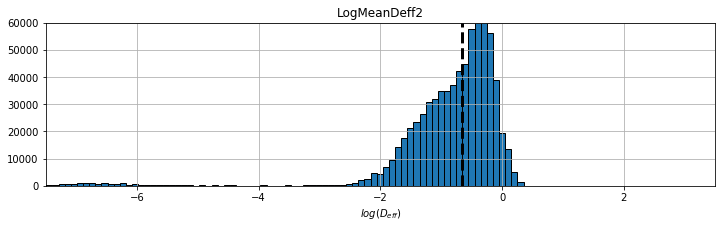

In [10]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, figsize=(12, 3))
bins = np.linspace(-10, 10, 200)
means = []
X_train = pcadataset.final

means.append(X_train['LogMeanDeff2'].median())
X_train.hist(column='LogMeanDeff2', bins=bins, figsize=(12,3), edgecolor='k', ax=ax, )
ax.set_xlim([-7.5, 3.5])
ax.set_ylim([0, 60000])
ax.axvline(X_train['LogMeanDeff2'].median(), color='k', linestyle='dashed', linewidth=3)

ax.set_xlabel(r'$log(D_{eff})$')
